**EDA Goals**:

We will approach our analysis w.r.to below common goals:

**1. Know Your Data**
   - Data volume
   - Columns and thier data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Quality & Fix**
   - Check null values
   - delete irrelevant features
   - impute null values
   - check duplicates

**3. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**4. Derived Features/Metrics**

**5. Conclusion**

In [1117]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dtm
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Data Understanding
    - Data volume
    - Columns and thier data types
    - Delete all redundant columns which are 0 non-null
    - Check data spread
    - Numeric vs Categorical Columns

In [1118]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)

In [1119]:
df_loan = pd.read_csv("loan.csv", low_memory=False)
print("No. of rows = ", df_loan.shape[0], "and no. of columns = ", df_loan.shape[1])
print("Here is some sample records from top and bottom...")
df_loan.head(3).append(df_loan.tail(3))

No. of rows =  39717 and no. of columns =  111
Here is some sample records from top and bottom...


C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\3774983430.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_loan.head(3).append(df_loan.tail(3))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1120]:
#Print all the columns and their data types
df_loan.info(verbose='all', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\4243720288.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_loan.info(verbose='all', null_counts=True)


In [1121]:
#Print shape of data set after deleted all redundant columns which are 0 non-null
print("No. of rows = ", df_loan.shape[0], "and no. of columns = ", df_loan.shape[1])
print("Here is some sample records from top and bottom...")
df_loan.head(3).append(df_loan.tail(3))

No. of rows =  39717 and no. of columns =  111
Here is some sample records from top and bottom...


C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\417582481.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_loan.head(3).append(df_loan.tail(3))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1122]:
# Check Categorical and Numerical variables
df_loan.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [1123]:
#Filter categorical columns and numerical columns
categorical_columns = list(df_loan.select_dtypes(include='object'))
numerical_columns = list(df_loan.select_dtypes(exclude='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numerical columns length: " + str(len(numerical_columns)))
print(numerical_columns)

categorical columns length: 24
['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']
numerical columns length: 87
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_c

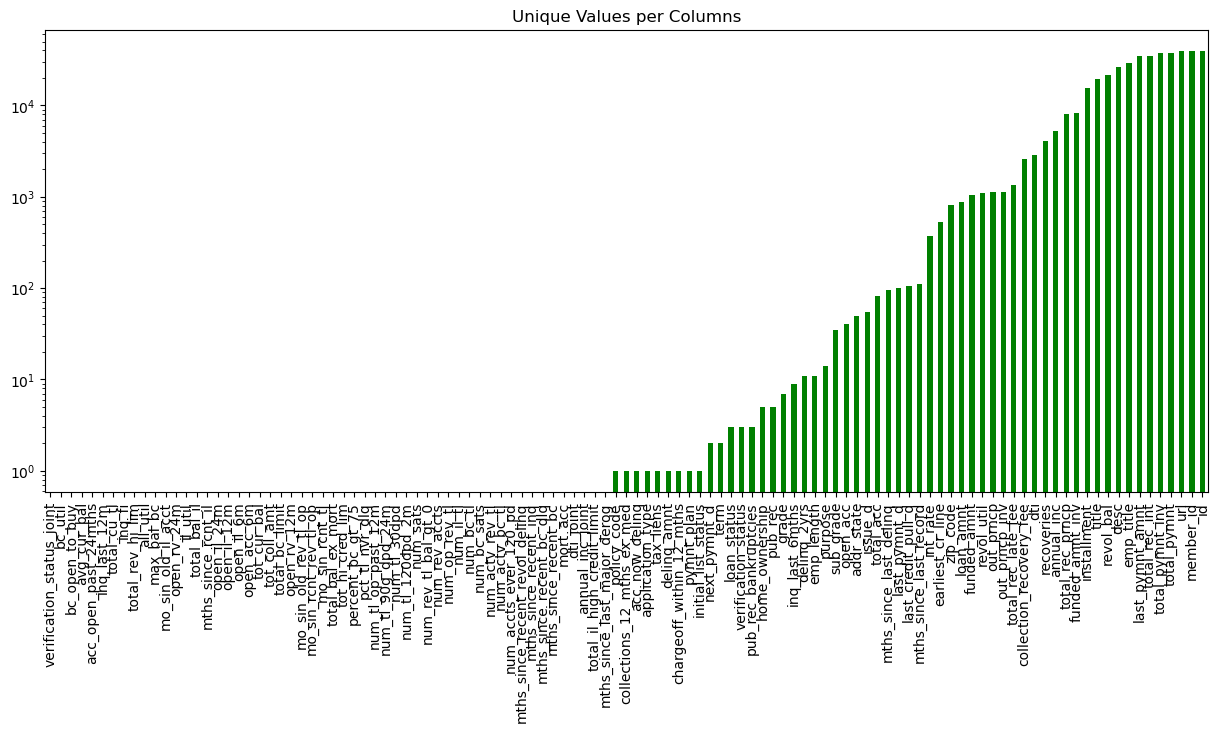

In [1124]:
# For each numerical feature compute number of unique entries
unique_values = df_loan.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green")
plt.show()

In [1125]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Conclusion of section 1. Know Your Data
Now, we have a good understanding of our data. We know that out data size is 39717 X 111. Some of these columns also have null values. We have 87 numerical features and 24 categorical features in our dataset. We have also seen their distributions and plotted their unique values.

### 2. Data Quality & Fix

    - Check duplicates
    - Missing Values and Treatment
    - Outlier detection and removal

#### 2.1 Check duplicates
By now, we know that column **member_id** and **id** are our unique keys here. So while checking the duplicates, we have to igore the unique keys.

In [1126]:
# Check if we have duplicates data records

duplicate_row = df_loan.drop(labels=["member_id", "id"], axis=1).duplicated().sum()
print("No. of duplicates records: ", duplicate_row)

No. of duplicates records:  0


In [1127]:
#Delete id column because member_id column is also unique value for each member and id column becomes redundant column
df_loan.drop(columns=['id'], axis=1, inplace=True)

In [1128]:
df_loan.info(verbose='all', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    member_id                       39717 non-null  int64  
 1    loan_amnt                       39717 non-null  int64  
 2    funded_amnt                     39717 non-null  int64  
 3    funded_amnt_inv                 39717 non-null  float64
 4    term                            39717 non-null  object 
 5    int_rate                        39717 non-null  object 
 6    installment                     39717 non-null  float64
 7    grade                           39717 non-null  object 
 8    sub_grade                       39717 non-null  object 
 9    emp_title                       37258 non-null  object 
 10   emp_length                      38642 non-null  object 
 11   home_ownership                  39717 non-null  object 
 12   annual_inc      

C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\608442665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_loan.info(verbose='all', null_counts=True)


#### 2.2 Missing Values and Treatment

In [1129]:
#Delete all redundant columns which are 0 non-null count
df_loan.dropna(axis=1, how='all', inplace=True)

In [1130]:
#Print all the columns and their data types
df_loan.info(verbose='all', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\4243720288.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_loan.info(verbose='all', null_counts=True)


In [1131]:
# Check the missing values % in each column
print(round(df_loan.isnull().sum()/len(df_loan.index), 3)*100)

member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.2
emp_length                     2.7
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          32.6
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_delinq        64.7
mths_since_last_reco

In [1132]:
# Number of column having missing values
print("Number of Column that has NaN values: ", len((round(df_loan.isnull().sum()/len(df_loan.index), 3)*100)))

Number of Column that has NaN values:  56


##### So, we can notice that missing values ranges from 0.1% to 97.1 %. Let's delete the columns that have more than 10% as null values.

In [1133]:
# Let's check all the column where we have more than 10 % missing data
missing_columns = df_loan.columns[100*(df_loan.isnull().sum()/len(df_loan.index)) > 10]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 4
Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d'],
      dtype='object')


In [1134]:
# Delete these 4 columns
df_loan = df_loan.drop(missing_columns, axis=1)
print(df_loan.shape)
print("Number of Column that has NaN values now: ", len((round(df_loan.isnull().sum()/len(df_loan.index), 3)*100)))

(39717, 52)
Number of Column that has NaN values now:  52


In [1135]:
# Let's filter all the remaining columns where we have missing data
missing_columns = df_loan.columns[df_loan.isnull().sum() > 0]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 10
Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [1136]:
categorical_missing_columns = list(df_loan[missing_columns].select_dtypes(include='object'))
numerical_missing_columns = list(df_loan[missing_columns].select_dtypes(exclude='object'))
print("categorical columns length: " + str(len(categorical_missing_columns)))
print(categorical_missing_columns)
print("numerical columns length: " + str(len(numerical_missing_columns)))
print(numerical_missing_columns)

categorical columns length: 6
['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']
numerical columns length: 4
['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


In [1137]:
# Check percentile all numerical missing columns
df_loan[numerical_missing_columns].describe()

,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39661.0,39661.0,39020.000000,39678.0
mean,0.0,0.0,0.043260,0.0
std,0.0,0.0,0.204324,0.0
min,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.000000,0.0
50%,0.0,0.0,0.000000,0.0
75%,0.0,0.0,0.000000,0.0
max,0.0,0.0,2.000000,0.0


In [1138]:
# Delete all numerical missing columns equal zero.
df_loan.drop(columns=['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [1139]:
# Check value count all categorical missing columns
df_loan[categorical_missing_columns].value_counts()

emp_title                                 emp_length  title                               revol_util  last_pymnt_d  last_credit_pull_d
Wells Fargo Bank                          < 1 year    Excellent Borrower                  38.20%      Apr-15        May-16                2
EQT                                       < 1 year    Credit Card Consolidation Loan      24%         Jan-13        Feb-13                2
FANYC                                     < 1 year    Debtbuster!                         32%         Feb-13        May-16                2
AMC Theatres                              < 1 year    Bimota                              75.50%      Apr-13        Apr-13                2
  old palm inc                            5 years     save %                              9.40%       Sep-15        May-16                1
                                                                                                                                         ..
Good Shepherd Services ya

In [1140]:
# Number of column having missing values
print("Number of Column that has NaN values: ", len((round(df_loan.isnull().sum()/len(df_loan.index), 3)*100)))

Number of Column that has NaN values:  49


In [1141]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [1142]:
categorical_columns = list(df_loan.select_dtypes(include='object'))
numerical_columns = list(df_loan.select_dtypes(exclude='object'))

In [1143]:
df_loan[numerical_columns].describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.0,0.0,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.0,0.0,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.0,0.0,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.0,0.0,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


In [1144]:
df_loan[categorical_columns].value_counts()

term        int_rate  grade  sub_grade  emp_title                    emp_length  home_ownership  verification_status  issue_d  loan_status  pymnt_plan  url                                                               purpose             title                        zip_code  addr_state  earliest_cr_line  revol_util  initial_list_status  last_pymnt_d  last_credit_pull_d  application_type
 36 months  10.00%    B      B2         AARP                         4 years     RENT            Verified             Mar-11   Fully Paid   n           https://lendingclub.com/browse/loanDetail.action?loan_id=702920   credit_card         Debt consolidation           200xx     DC          Mar-02            82.10%      f                    Apr-14        May-16              INDIVIDUAL          1
            8.90%     A      A5         NaturaLawn of America        10+ years   MORTGAGE        Not Verified         Dec-11   Fully Paid   n           https://lendingclub.com/browse/loanDetail.action?loan_id=1041

In [1145]:
# Delete redundant columns
df_loan.drop(columns=['url', 'zip_code','pymnt_plan','initial_list_status', 'acc_now_delinq', 'delinq_amnt', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'emp_title', 'title'], inplace=True)

##### Now, we also want to check the missing values per rows.

In [1146]:
df_loan.isnull().sum(axis=1).sort_values(ascending=False)

24984    2
4714     2
11282    2
31271    1
31296    1
        ..
13479    0
13480    0
13481    0
13482    0
19858    0
Length: 39717, dtype: int64

##### Obviously, the above information is not very useful as we can not see the entire list. A better way to visualize for using the pivot table

In [1147]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [1148]:
# Check number of rows have NaN values on number of columns over a row
number_of_nan_columns = df_loan.isnull().sum(axis=1).sort_values(ascending=False).value_counts()
df_number_of_nan_columns = pd.DataFrame(dict({"no_columns": number_of_nan_columns.index, "no_rows": number_of_nan_columns.values}))
print(df_number_of_nan_columns)

   no_columns  no_rows
0           0    37898
1           1     1816
2           2        3


##### no_rows is 37898 rows which is not having any NaN values on 38 columns
##### no_rows is 1816 rows which is having NaN values on one any columns of 38 columns
##### no_rows is 3 rows which is having NaN values on two any columns of 38 columns

In [1149]:
# Remove row index is 0 because that is number of rows don't have any columns which contains NaN values
df_number_of_nan_columns.drop(index=0, inplace=True)

In [1150]:
# Check the % missing values on number of columns over a row
print("Percentage of number of columns:")
df_number_of_nan_columns['percentage_of_columns'] = round(df_number_of_nan_columns.no_columns / len(df_loan.columns) * 100, 3)
print(df_number_of_nan_columns[['no_columns', 'percentage_of_columns']])

Percentage of number of columns:
   no_columns  percentage_of_columns
1           1                  2.632
2           2                  5.263


#### As above results, we don't need to remove any rows because the % missing values on number of columns over a row don't have quite high

In [1151]:
df_loan.head(5).append(df_loan.tail(5))

C:\Users\Admin\AppData\Local\Temp\ipykernel_17416\3077895967.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_loan.head(5).append(df_loan.tail(5))


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0.0
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,1,INDIVIDUAL,NaN
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,1,INDIVIDUAL,NaN
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,1,INDIVIDUAL,NaN
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,1,INDIVIDUAL,NaN
39716,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,MA,14.29,1,0,7,0,4175,51.50%,8,0.00,0.00,9195.263334,980.83,7500.00,1695.26,0.00,0.00,0.00,256.59,1,INDIVIDUAL,NaN


### 2.3 Outlier detection and removal

In [1152]:
print(df_loan.columns)

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')


#### We will choose **annual_inc** variable to figure out outlier because this variable will make a decision for approved loan of applicants

In [1153]:
# Check percentile of annual_inc to see extreme values
df_loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

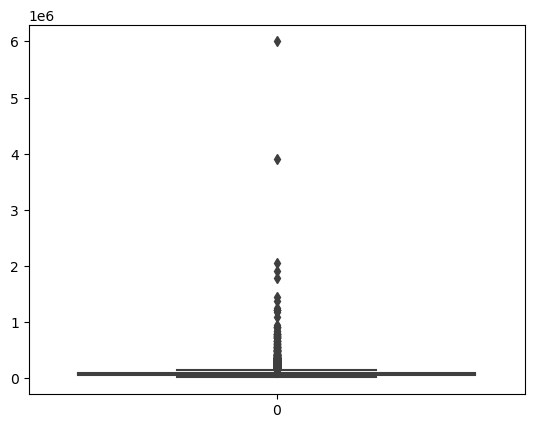

In [1154]:
# Visualize annual_inc to see outliers
sns.boxplot(data=df_loan.annual_inc)
plt.show()

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [1155]:
# Figure out quantiles to detect outlier amount
df_loan.annual_inc.quantile([0.25, 0.50, 0.75, 0.95, 0.99])

0.25     40404.00
0.50     59000.00
0.75     82300.00
0.95    142000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [1156]:
# We will only delete all rows which have greater than value of 95%
per_95_annual_inc = df_loan.annual_inc.quantile(0.95)
df_loan.drop(index=df_loan[df_loan['annual_inc'] > per_95_annual_inc].index, inplace=True)

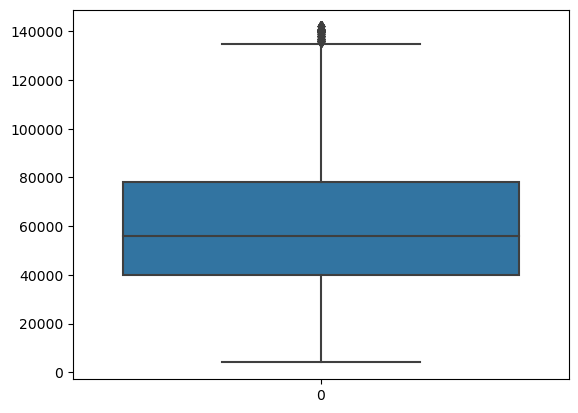

In [1157]:
sns.boxplot(data=df_loan.annual_inc)
plt.show()

In [1158]:
# Check percentile of annual_inc again
df_loan.annual_inc.describe()

count     37743.000000
mean      61071.860572
std       27830.995882
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

### Now the **annual_inc** data looks good and proceeding next.
Let's analyze other numerical variables which could possibly have outliers.
- **loan_amnt** depends on annual_inc and they are correlation numerical variables if lending club company will base on annual_inc to lend loan amount to borrowers

In [1159]:
df_loan.loan_amnt.describe()

count    37743.000000
mean     10847.490925
std       7156.268085
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

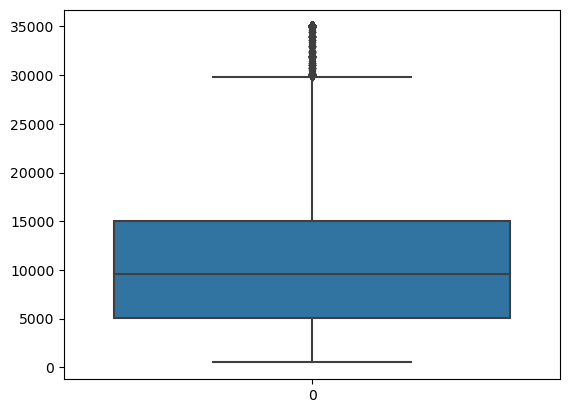

In [1160]:
sns.boxplot(data=df_loan.loan_amnt)
plt.show()

As description above for loan_amnt variable, we will max value of loan_amnt less than max value of annual_inc. So we can accept this values.

### 3. Data Content Analysis
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

#### Next we analysis **emp_length** because **emp_length** will effect to annual_inc. So we need to check null value and impute it.

In [1161]:
df_loan.emp_length.value_counts()

10+ years    8247
< 1 year     4400
2 years      4196
3 years      3906
4 years      3292
5 years      3129
1 year       3113
6 years      2133
7 years      1702
8 years      1385
9 years      1185
Name: emp_length, dtype: int64

In [1162]:
mode_emp_length = df_loan.emp_length.mode()[0]
print(mode_emp_length)

10+ years


In [1163]:
# Impute null value for emp_length
df_loan.emp_length = df_loan.emp_length.fillna(value=mode_emp_length)

In [1164]:
# Check null value emp_length again
print(df_loan.emp_length.isna().sum())

0


In [1165]:
# Convert emp_length categorical column to numerical column
df_loan['emp_length'] = df_loan.emp_length.apply(lambda x: 0 if x[0] == '<' else 10 if x.startswith('10+') else int(x[0]))

In [1166]:
df_loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1167]:
df_loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [1168]:
df_loan.home_ownership = df_loan.home_ownership.apply(lambda x: 'OTHER' if x == 'NONE' else x)

In [1169]:
df_loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1170]:
df_loan.term = df_loan.term.apply(lambda x: int(x.strip()[:2]))

In [1171]:
df_loan.int_rate.dtype

dtype('O')

In [1172]:
df_loan.int_rate = df_loan.int_rate.apply(lambda x: float(x[:-1]))

In [1173]:
df_loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [1174]:
df_loan.sub_grade = df_loan.sub_grade.apply(lambda x: int(x[-1]))

In [1175]:
df_loan.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [1176]:
df_loan.issue_d = df_loan.issue_d.apply(lambda x: dtm.datetime.strptime(x, "%b-%y"))